# Handwritten Digit Recognition on MNIST Data using PyTorch 
## Architecture 1: Fully Connected Feed Forward Neural Network
### Accuracy Obtained: 97.4%

### Necessary imports


In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import os
from google.colab import drive

### Download the Dataset and Define the Transforms

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
train_set = datasets.MNIST('MNIST_DATASET/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('MNIST_DATASET/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

### Exploring the Data

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


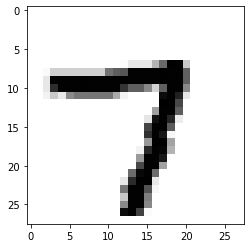

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

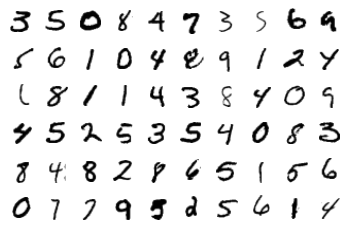

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining the Neural Network


In [ ]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0036, -0.0036, -0.0036,  ..., -0.0036, -0.0036, -0.0036],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017]],
       device='cuda:0')


In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0141,  0.0333, -0.0017,  ..., -0.0066, -0.0024, -0.0011],
        [ 0.0122,  0.0202,  0.0152,  ..., -0.0124, -0.0074, -0.0025],
        [-0.0076,  0.0093, -0.0055,  ...,  0.0087,  0.0144, -0.0183],
        ...,
        [-0.0098,  0.0075,  0.0225,  ..., -0.0092,  0.0238,  0.0302],
        [-0.0352,  0.0305,  0.0272,  ..., -0.0199, -0.0218,  0.0305],
        [ 0.0303, -0.0268,  0.0335,  ...,  0.0125, -0.0043, -0.0064]],
       device='cuda:0', requires_grad=True)
Gradient - tensor([[ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041]],
       device='cuda:0')


In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0141,  0.0333, -0.0018,  ..., -0.0067, -0.0024, -0.0012],
        [ 0.0122,  0.0202,  0.0152,  ..., -0.0124, -0.0074, -0.0025],
        [-0.0075,  0.0094, -0.0055,  ...,  0.0087,  0.0144, -0.0183],
        ...,
        [-0.0098,  0.0075,  0.0225,  ..., -0.0092,  0.0238,  0.0302],
        [-0.0352,  0.0305,  0.0272,  ..., -0.0199, -0.0218,  0.0305],
        [ 0.0304, -0.0267,  0.0336,  ...,  0.0126, -0.0043, -0.0064]],
       device='cuda:0', requires_grad=True)


### Core Training of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6376181347950943
Epoch 1 - Training loss: 0.2850154344159276
Epoch 2 - Training loss: 0.22547782315358297
Epoch 3 - Training loss: 0.1851819709086342
Epoch 4 - Training loss: 0.15586421224695723
Epoch 5 - Training loss: 0.1356139949667873
Epoch 6 - Training loss: 0.11847522670426952
Epoch 7 - Training loss: 0.10441465470205143
Epoch 8 - Training loss: 0.09490989497515248
Epoch 9 - Training loss: 0.08590258659719467
Epoch 10 - Training loss: 0.07808690335500294
Epoch 11 - Training loss: 0.07041935388620363
Epoch 12 - Training loss: 0.06513098264976876
Epoch 13 - Training loss: 0.06140058645124692
Epoch 14 - Training loss: 0.0561076915874553

Training Time (in minutes) = 1.9406605124473573


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


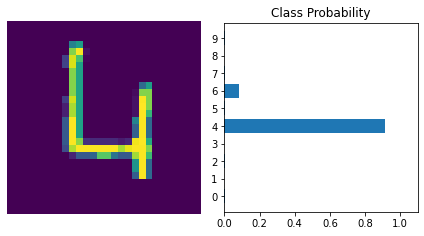

In [ ]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\n Model accuracy: {:.4f} %  ".format(100*(correct_count/all_count)))

Number Of Images Tested = 10000

 Model accuracy: 97.4700 %  
